In [17]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data = np.loadtxt('Fibras.csv', delimiter=',', skiprows=1, unpack=True)[1]

In [18]:
med = []
i = 0
while i < len(data):
    med.append((data[i]+data[i+1])/2)
    i += 2

print(med)

[144.3535, 145.922, 106.7885, 117.3025, 112.072, 72.82300000000001, 84.6565, 92.987, 128.6645, 130.889, 143.36, 130.7015, 122.22749999999999, 122.318, 125.9565, 130.015, 107.39099999999999, 114.791, 147.185, 149.04, 108.072, 124.84, 141.03300000000002, 77.8255, 112.45150000000001, 116.816, 88.9285, 140.58100000000002, 90.74950000000001]


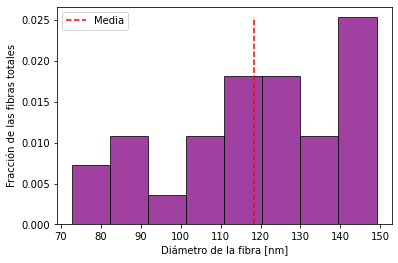

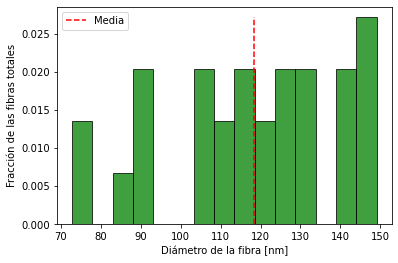

In [19]:
plt.xlabel("Diámetro de la fibra [nm]")
plt.ylabel("Fracción de las fibras totales")
n1,bins1,patches1 = plt.hist(med,bins=8,edgecolor="black",facecolor="purple",alpha=0.75,density=True)
plt.vlines(np.mean(med),0,max(n1),'r',linestyles="dashed",label="Media")
plt.legend()
plt.savefig("hist_ancho.png")
plt.show()
plt.xlabel("Diámetro de la fibra [nm]")
plt.ylabel("Fracción de las fibras totales")
n2,bins2,patches2 = plt.hist(med,bins=15,edgecolor="black",facecolor="green",alpha=0.75,density=True)
plt.vlines(np.mean(med),0,max(n2),'r',linestyles="dashed",label="Media")
plt.legend()
plt.savefig("hist_angosto.png")

Hay 2 distintos porque el primero no deja divisiones vacías y el segundo es más preciso

In [20]:
med_c = []
for i in range(len(med)):
    med_c.append([round(med[i],2)])

with open("Fibras final.csv","w") as f:
    writer = csv.writer(f)
    writer.writerow('')
    writer.writerows(med_c)

err = []
for i in range(len(med_c)):
    err.append(round(11.43/med_c[i][0]*100,1))

print(err)

[7.9, 7.8, 10.7, 9.7, 10.2, 15.7, 13.5, 12.3, 8.9, 8.7, 8.0, 8.7, 9.4, 9.3, 9.1, 8.8, 10.6, 10.0, 7.8, 7.7, 10.6, 9.2, 8.1, 14.7, 10.2, 9.8, 12.9, 8.1, 12.6]


/tmp/ipykernel_4268/569742176.py:8: RuntimeWarning: invalid value encountered in log
  return A*np.log(C*x)


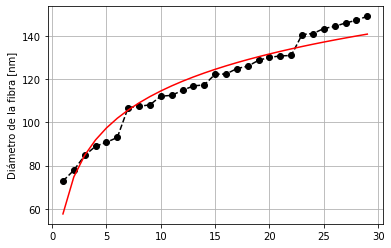

In [21]:
a = list(range(1,len(med)+1))
med.sort()
plt.plot(a,med,"o--",color="black")

from scipy.optimize import curve_fit

def f_ajuste(x,A,C):
    return A*np.log(C*x)
popt, pcov = curve_fit(f_ajuste,a,med)
A,C = popt
y_ajuste = []
for i in range(len(med)):
    y_ajuste.append(f_ajuste(a[i],A,C))

plt.grid()
plt.ylabel("Diámetro de la fibra [nm]")
plt.plot(a,y_ajuste,'r')
plt.savefig("graph.png")